<a href="https://colab.research.google.com/github/mridul9714/Twitter-Sentimental-Analysis-Using-ML-Model-NLP-/blob/main/1_TWITTER_SENTIMENT_ANALYSIS_(NLP)_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#insalling kaggle librabry
! pip install kaggle
!pip install pandas nltk


#Upload your Kaggle.json file

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Twitter Sentiment dataset

In [4]:
#Api to fetch the dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 99% 80.0M/80.9M [00:01<00:00, 118MB/s] 
100% 80.9M/80.9M [00:01<00:00, 84.2MB/s]


In [5]:
#extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/sentiment140.zip'
with ZipFile (dataset,'r') as zip:
  zip.extractall()
  print('The data set is extracted')

The data set is extracted


Importing the depedencis

In [9]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
#printing stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Processing

In [12]:
#loading the data from csv to pandas dataframe
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')


In [13]:
#checking the number of rows and coloum
twitter_data.shape

(1599999, 6)

In [14]:
#printing the first 5 rows of dataframe
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
#naming the columns and reading the dataset again
column_names = ['target','ids','date','flag','user','text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names= column_names, encoding='ISO-8859-1')

In [87]:
#checking the number of rows and colmns
twitter_data.shape

(1600000, 6)

In [16]:
#printing the first 5 rows of dataframe
twitter_data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


from matplotlib import pyplot as plt
_df_0['ids'].plot(kind='hist', bins=20, title='ids')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('user').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['target']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'target'}, axis=1)
              .sort_values('target', ascending=True))
  xs = counted['target']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('target', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['target']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'target'}, axis=1)
              .sort_values('target', ascending=True))
  xs = counted['target']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('target', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user')):
  _plot_series(series, series_name, i)
  fig.legend(title='user', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['target']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'target'}, axis=1)
              .sort_values('target', ascending=True))
  xs = counted['target']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('target', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ids']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ids'}, axis=1)
              .sort_values('ids', ascending=True))
  xs = counted['ids']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('ids', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ids')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['ids'].plot(kind='line', figsize=(8, 4), title='ids')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user'].value_counts()
    for x_label, grp in _df_9.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('user')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_10.groupby('user')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user')
_ = plt.ylabel('text')

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='ids', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['user'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='ids', y='user', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='ids', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

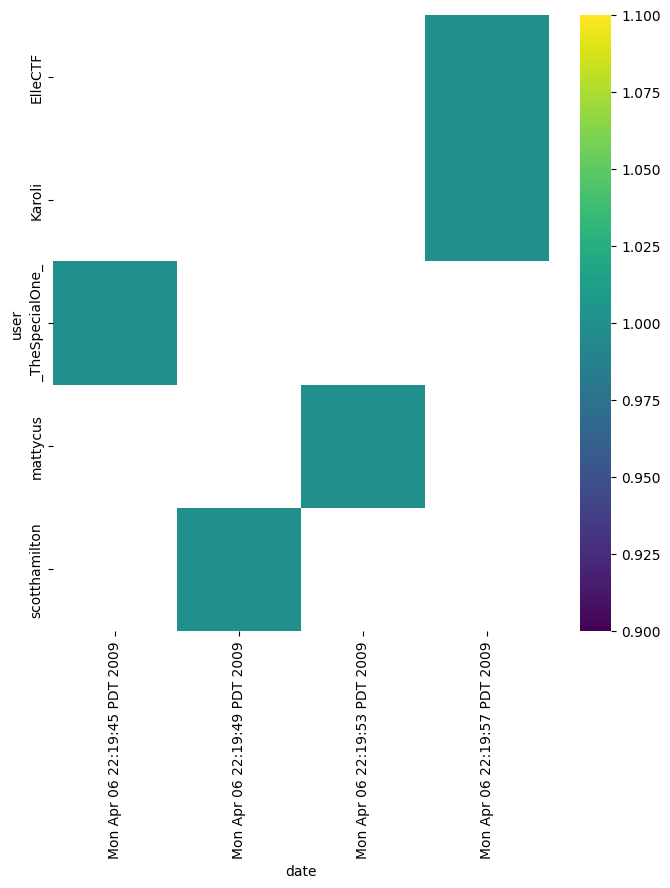

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user'].value_counts()
    for x_label, grp in _df_9.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('user')

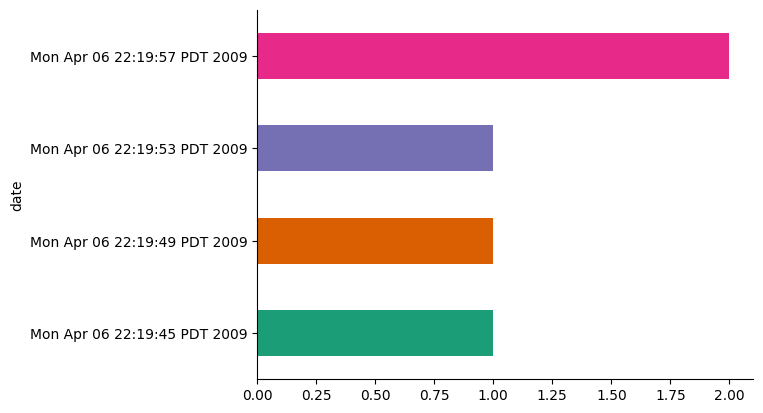

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

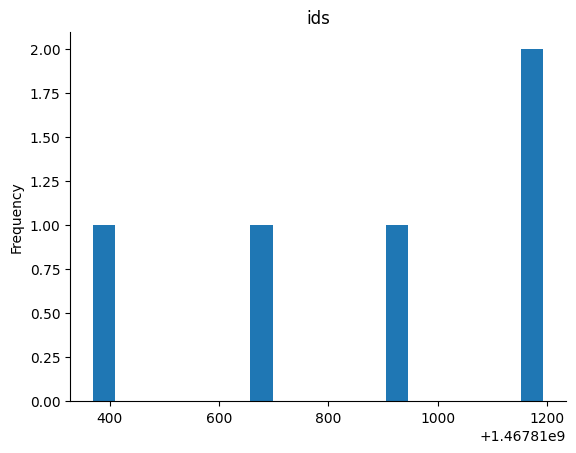

In [21]:
from matplotlib import pyplot as plt
_df_0['ids'].plot(kind='hist', bins=20, title='ids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [89]:
#counting the number of missing value in the dataset
twitter_data.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [90]:
#checking the distribution of target columns
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Convert the target "4" to "1"

In [91]:
twitter_data.replace({'target': {4: 1}}, inplace=True)

In [92]:
#checking the distribution of target columns
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

0 means--> Negative Tweet
1 means-->Positive Tweet

**Stemming**

Stemming is the process of reducing to it's root word


example: actress,actor,acting = act

In [93]:
port_stem = PorterStemmer()

In [ ]:
def stemming (content):
    stemmed_content = re.sub('[^a-zA-Z\s]', '', content) # Indent this line
    stemmed_content = stemmed_content.lower() # Indent this line
    stemmed_content = stemmed_content.split() # Indent this line
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # Indent this line
    stemmed_content = ''.join(stemmed_content) # Indent this line
    return stemmed_content # Indent this line

In [95]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

In [96]:
twitter_data.head()

,target,ids,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoothttptwitpiccomyzlawwwthatbummershoul...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upsetcantupdatfacebooktextmightcriresultschool...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichandivemanitimeballmanagsaverestgobound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,wholebodifeelitchilikefire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclassbehavimmadcantsee


In [97]:
print(twitter_data['stemmed_content'])

0          switchfoothttptwitpiccomyzlawwwthatbummershoul...
1          upsetcantupdatfacebooktextmightcriresultschool...
2               kenichandivemanitimeballmanagsaverestgobound
3                                 wholebodifeelitchilikefire
4                           nationwideclassbehavimmadcantsee
                                 ...                        
1599995                               wokeschoolbestfeelever
1599996      thewdbcomcoolhearoldwaltinterviewhttpblipfmbmta
1599997                             readimojomakeovaskdetail
1599998           happithbirthdaybooallltimetupacamarushakur
1599999    happicharitytuesdaythenspccsparkscharspeakinguphh
Name: stemmed_content, Length: 1600000, dtype: object


In [98]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [99]:
from tkinter.constants import X
#separating the data and label
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values



In [100]:
print(X)

['switchfoothttptwitpiccomyzlawwwthatbummershouldagotdavidcarrthirdday'
 'upsetcantupdatfacebooktextmightcriresultschooltodayalsoblah'
 'kenichandivemanitimeballmanagsaverestgobound' ...
 'readimojomakeovaskdetail' 'happithbirthdaybooallltimetupacamarushakur'
 'happicharitytuesdaythenspccsparkscharspeakinguphh']


In [101]:
print(Y)

[0 0 0 ... 1 1 1]


Spliting the training data and test data

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [103]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [104]:
print(X_train)

['watchsawivdrinklilwine' 'hatermagazinim'
 'eventhoughfavouritdrinkthinkvodkacokewipemindtimethinkimgonnafindnewdrink'
 ... 'eagermondayafternoon'
 'hopeeveryonmothergreatdaycantwaithearguystoretomorrow'
 'lovewakefolgerbadvoicdeeper']


In [105]:
print(X_test)

['mmangenfinehaventmuchtimechattwitterhubbibacksummeramptenddominfreetime'
 'ahmayshowwruthkimampgeoffreysanhueza' 'ishataramaybbayareathangdammit'
 ... 'destinineverthelesshooraymemberwondersafetrip' 'feelwell'
 'supersandrothank']


In [106]:
#converting textual data to numerical data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [107]:
print(X_train)

  (0, 1164717)	1.0
  (1, 433911)	1.0
  (2, 288241)	1.0
  (3, 1068144)	1.0
  (4, 1096844)	1.0
  (5, 198816)	1.0
  (6, 594277)	1.0
  (7, 111454)	1.0
  (8, 794651)	1.0
  (9, 480338)	1.0
  (10, 286084)	1.0
  (11, 907799)	1.0
  (12, 1140917)	1.0
  (13, 385994)	1.0
  (14, 998205)	1.0
  (15, 1237890)	1.0
  (16, 23755)	1.0
  (17, 333538)	1.0
  (18, 431925)	1.0
  (19, 176755)	1.0
  (20, 900145)	1.0
  (21, 455546)	1.0
  (22, 330474)	1.0
  (23, 220749)	1.0
  (24, 1240038)	1.0
  :	:
  (1279975, 93667)	1.0
  (1279976, 1079674)	1.0
  (1279977, 899390)	1.0
  (1279978, 749390)	1.0
  (1279979, 757447)	1.0
  (1279980, 812652)	1.0
  (1279981, 546473)	1.0
  (1279982, 915110)	1.0
  (1279983, 478802)	1.0
  (1279984, 72005)	1.0
  (1279985, 56686)	1.0
  (1279986, 985822)	1.0
  (1279987, 740926)	1.0
  (1279988, 1199753)	1.0
  (1279989, 434974)	1.0
  (1279990, 492909)	1.0
  (1279991, 276040)	1.0
  (1279992, 1146427)	1.0
  (1279993, 1147067)	1.0
  (1279994, 67716)	1.0
  (1279995, 1075463)	1.0
  (1279996, 1141133

In [108]:
print(X_test)

  (22, 144255)	1.0
  (36, 107548)	1.0
  (55, 1219396)	1.0
  (104, 1111078)	1.0
  (211, 652230)	1.0
  (216, 328378)	1.0
  (287, 1149705)	1.0
  (316, 617514)	1.0
  (317, 198840)	1.0
  (326, 852541)	1.0
  (343, 718374)	1.0
  (356, 977208)	1.0
  (405, 337686)	1.0
  (411, 715320)	1.0
  (412, 613068)	1.0
  (439, 386924)	1.0
  (503, 874754)	1.0
  (534, 1043339)	1.0
  (545, 1151885)	1.0
  (575, 505725)	1.0
  (576, 1203800)	1.0
  (585, 1110672)	1.0
  (586, 751414)	1.0
  (597, 252035)	1.0
  (659, 1162909)	1.0
  :	:
  (319474, 427274)	1.0
  (319546, 720219)	1.0
  (319550, 989731)	1.0
  (319573, 1022823)	1.0
  (319595, 438047)	1.0
  (319630, 482393)	1.0
  (319632, 373347)	1.0
  (319640, 385128)	1.0
  (319649, 1155213)	1.0
  (319668, 139289)	1.0
  (319673, 497254)	1.0
  (319679, 427563)	1.0
  (319687, 1169341)	1.0
  (319700, 897519)	1.0
  (319712, 254237)	1.0
  (319716, 1172915)	1.0
  (319752, 1191953)	1.0
  (319779, 796273)	1.0
  (319813, 878768)	1.0
  (319838, 1237924)	1.0
  (319886, 612330)	1.0


Trainning the machine leraning model

In [109]:
model = LogisticRegression(max_iter=1000)

In [110]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accracy Score

In [111]:
#accuracy score in the traing data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [112]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.99647734375


In [113]:
#accuracy score in the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [114]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.518565625


Model Accuracy = 52%

Saving the model

In [115]:
import pickle


In [116]:
filtename = 'finalized_model.sav'
pickle.dump(model, open(filtename, 'wb'))

Using the saved model for future prediction

In [117]:
#loading the saved model
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

New prediction

In [118]:
X_new = X_test[200]
print(Y_test[200])
prediction = loaded_model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

1
[1]
The tweet is positive


In [119]:
X_new = X_test[3]
print(Y_test[3])
prediction = loaded_model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

0
[1]
The tweet is positive
